# Fasjämvikter med van der Waals gaslag

Allmäna gaslagen säger att trycket $p$ [N/$m^2$]varierar med koncentration, $c=n/V$ [mol/$L$], och tempertur, $T$ [K]. $R$ är den allmäna gaskonstanten.

$p = 1000 c R T$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.signal import argrelextrema

In [2]:
R = 8.314462618 #J/K/mol
N_A = 6.022e23
def gaslag(c,T):
    p=1000.*c*R*T
    return p

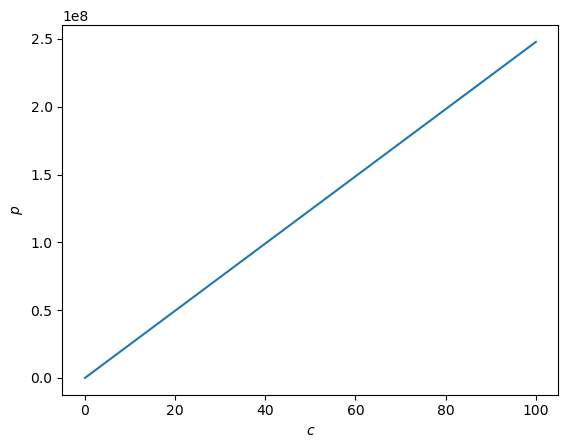

In [3]:
c = np.linspace(0.001,100,1000)
T = 298 # K
plt.plot(c,gaslag(c,T))
plt.xlabel("$c$")
plt.ylabel("$p$")
plt.show()

# van der Waals ekvation för imperfekta gaser (alltså riktiga gaser)

Trycket ges nu istället av:

$p = \frac{1000 c R T}{(1.-1000 c b)}-a (1000c)^2$

där $b$ är en utesluten volym och $a$ en växelverkans parameter. Om du sätter $a=0$ och $b=0$ så vår vi tillbaka den ideala gaslagen ovan. $b$ kommer ha enheten volym och $a$ volym i kvadrat.

$b$ är ungefärligt lika med $\frac{4 \pi d^3}{3}N_A$ där $d$ är diametern på atomen/molekylen och $N_A$ är Avogadros tal. Vi börjar med att definera funktionern för vdW som tar argumenten $c$ och $T$ antaget att $a$ och $b$  är kända

In [4]:
def vdW(c,T):
    p=1000*c*R*T/(1.-1000*c*b)-a*c*c*1e6
    return p

### Rita lite grafer för olika $a$ parametrar
Vi börjar med att definera en koncentrations intervall där vi vill titta på trycket, från låg till hög.
Notera att `vdW`-uttrycket divergerar då $1000.*c*b$. Det mostsvara en koncentration då atomerna börjar överlappa varandra. Vi begränsar därmed $c$. $b$ beräknas för en molekyl som är 3 Å i diameter.

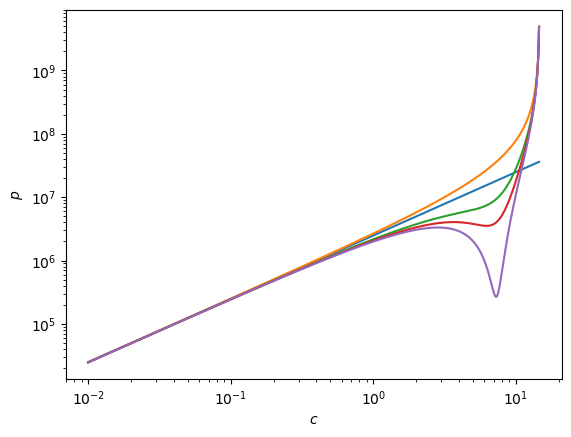

In [5]:
b = 4.*np.pi/3.*np.power(3e-10,3)*N_A
cmax=1./b/1000.
c = np.logspace(np.log10(0.01),np.log10(cmax),1000,endpoint=False)
plt.plot(c,gaslag(c,T))
a = 0.
plt.plot(c,vdW(c,T))
a = 0.5
plt.plot(c,vdW(c,T))
a = 0.6
plt.plot(c,vdW(c,T))
a = 0.67
plt.plot(c,vdW(c,T))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("$c$")
plt.ylabel("$p$")
plt.show()

# Notera att vi får en icke-monoton kurva
Låt oss rita graferna i $p$-$V$ planet istället.

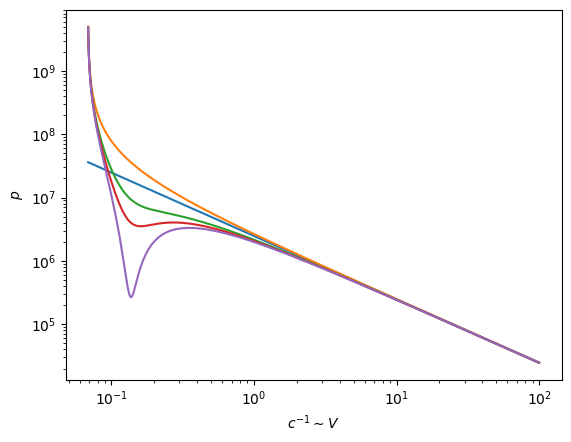

In [6]:
b = 4.*np.pi/3.*np.power(3e-10,3)*N_A
cmax=1./b/1000.
c = np.logspace(np.log10(0.01),np.log10(cmax),1000,endpoint=False)
plt.plot(1./c,gaslag(c,T))
a = 0.
plt.plot(1./c,vdW(c,T))
a = 0.5
plt.plot(1./c,vdW(c,T))
a = 0.6
plt.plot(1./c,vdW(c,T))
a = 0.67
plt.plot(1./c,vdW(c,T))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("$c^{-1} \sim V$")
plt.ylabel("$p$")
plt.show()

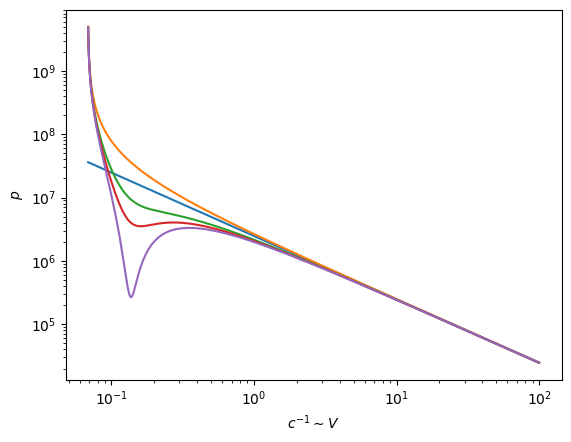

In [7]:
plt.plot(1./c,gaslag(c,T))
a = 0.
plt.plot(1./c,vdW(c,T))
a = 0.5
plt.plot(1./c,vdW(c,T))
a = 0.6
plt.plot(1./c,vdW(c,T))
a = 0.67
plt.plot(1./c,vdW(c,T))
plt.xscale('log')
plt.yscale('log')
#plt.axhline(2e6)
plt.xlabel("$c^{-1} \sim V$")
plt.ylabel("$p$")
plt.show()

# Även här ser vi en icke-monotonisk kurva

Vi ser att kompressibiliten, $\kappa=\frac{\partial V}{V\partial p}$ är negative för vissa volymer. Detta är ofysikalsikt, då det skulle betyda att volymen ökade vi trycker på gasen. Vad de i praktiken innebär är att lösningen fasseparerar i en utspädd fas och en koncentrared fas. 
Som ni troligtivs inträffar detta så fort vi har en negative kompressibilitet. Men till vilka koncentrationer fassepararar vi? Och vid vilket tryck inträffar detta (kom ihåg att en fasövergång sker vid konstant tryck och temperatur)? För att göra det så tar vi reda på lokala maxima och minima i trycket. Jämviktstrycket (för fasövergångnen) kommer vara mellan dessa två extremiteter.

För detta ändamål använder vi oss av `Scipy`

# Maxwell konstruktion
För att veta vilket tryck fasövergången sker vi så kan vi använda oss av Maxwells konstruktion, som säger att integralen $\int_{V_1}^{V_2} p(V)-p_{\rm guess} \,dV$ under ett gissat tryck  och mellan dess skärningspunkter med denna linjen ska vara lika med integralen över  $\int_{V_2}^{V_3} p(V)-p_{\rm guess} \,dV samma tryck, mellan dess skärningspunkter. Notera vi får tre skärningspunkter i detta fallet. 
Vad vi nu gör är att testa X antal tryck mellan de lokala maxima och minima och ser när integralerna är lika med varandra (med motsatt tecken). Vi kan därmed bestämma jämviktstrycket och jämviktsdensiteterna. 

### Obs notera att areorna inte ser lika ut, men det beror på våran log-log graf

Vi definerar en ny funktion kallad `vdWp` som ger tryck-skillanden mellan `vdW` och vårt gissade tryck. 

Vi använder `numpy` för att hitta skärningspunkterna och `scipy` för att integrera. Vi sparar summan av de två integralerna för de olika testtrycken. Vi tar sedan de tryck som ger lika areor.

In [8]:
def vdWp(ic,T,p0):
    p=1000./ic*R*T/(1.-1000.*b/ic)-a/ic/ic*1e6-p0
#    print(p,p0)
    return p

densiteter (västka, gas) [mol/L]: 2.825585944286123 8.94260417013798


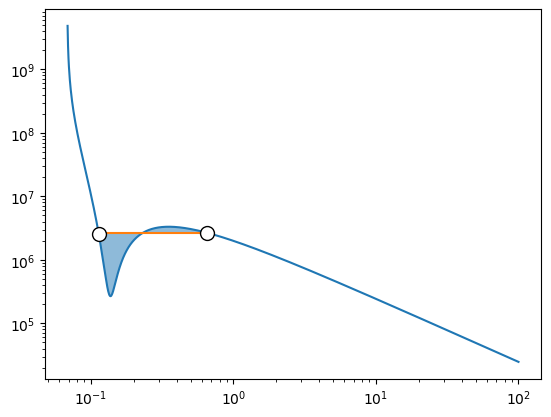

In [9]:
ic = 1./c
press = vdW(c,T)
imax = argrelextrema(press, np.greater)
imin = argrelextrema(press, np.less)
ptest = np.linspace(press[imin],press[imax],100)
area = []
#print(press[imin])
#print(press[imax])
for i in ptest:
#    print(i)
    icross = np.argwhere(np.diff(np.sign(press - i))).flatten()
    if icross.shape[0]>2:
        int1 = integrate.quad(vdWp,ic[icross[2]],ic[icross[1]],args=(T,i))
        int2 = integrate.quad(vdWp,ic[icross[1]],ic[icross[0]],args=(T,i))
        area.append(int1[0]+int2[0])
#print(area)
zero_crossings = np.where(np.diff(np.sign(area)))[0]
print("densiteter (västka, gas) [mol/L]:",c[icross[0]],c[icross[-1]])
plt.plot(ic,vdW(c,T))
plt.xscale('log')
plt.yscale('log')
#print(zero_crossings[0])
#print(ptest[zero_crossings[0]])
icross = np.argwhere(np.diff(np.sign(press - ptest[zero_crossings[0]]))).flatten()
#print(icross)
plt.plot([ic[icross[0]],ic[icross[-1]]],[ptest[zero_crossings[0]],ptest[zero_crossings[0]]])
icf = ic[icross[0]:icross[-1]]
plt.fill_between(icf,vdW(1./icf,T),ptest[zero_crossings[0]],alpha=0.5)
#plt.axhline(ptest[zero_crossings[0]],c='k')
#plt.plot(1./c[],vdW(c[imin],T),marker='o',c='r',mfc='w',ms=10)
plt.plot(1./c[icross[0]],vdW(c[icross[0]],T),marker='o',c='k',mfc='w',ms=10)
plt.plot(1./c[icross[-1]],vdW(c[icross[-1]],T),marker='o',c='k',mfc='w',ms=10)
plt.show()

# Uppgift

* Skapa ett fasdiagram. Slinga över olika $a$ värden för att se när vi får fasövergångar.
Spara sedan jämviktstrycket och de två koncentrationerna. Rita sedan de två koncentrationerna (den utspädda som en kurvan och den andra som en annan kurva) som funktion av a.

* Gör samma sak men behåll $a$ konstant och ändra istället $T$. Gör samma graf (fasdiagram) men mot $T$ istället.

* Antag att $a$ har ett svagt temperature beroende. Kommer detta påverka ert fasdiagram? Hur? Illustrera med en graf.
